In [1]:
import matplotlib.pyplot as plt
import  numpy as np
import  pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
import random
import tensorflow as tf

sns.set_theme(style="ticks")
sns.set_palette("viridis")

## 5.0 DATA PRE-PROCESSING

#### 5.1 - Changing data type

In [ ]:
columns_type= ['NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'number_times_latepay60-89',
       'NumberOfDependents']

X_train[columns_type] = X_train[columns_type].astype(np.int16)
y_train = y_train.astype(np.int8)
X_train['age'] = X_train['age'].astype(np.int8)


X_test[columns_type] = X_test[columns_type].astype(np.int16)
y_test = y_test.astype(np.int8)
X_test['age'] = X_test['age'].astype(np.int8)
pd.DataFrame(X_train.dtypes)


# Note we are reducing the bits usage of the features looking for a better perfomance. Some features as 'Age' doesn't need any bigger type than int8


,0
balance_divided_creditlimit,float64
age,int8
DebtRatio,float64
MonthlyIncome,float64
NumberOfOpenCreditLinesAndLoans,int16
NumberOfTimes90DaysLate,int16
NumberRealEstateLoansOrLines,int16
number_times_latepay60-89,int16
NumberOfDependents,int16


#### 5.2 -   Normalization

In [ ]:

real_columns= X_train.columns
X_train= pd.DataFrame(normalize(X_train), columns=real_columns)
X_test = pd.DataFrame(normalize(X_test), columns=real_columns)
X_test

,balance_divided_creditlimit,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
0,1.513451e-08,0.002360,0.000005,0.999997,0.000640,0.000000,0.000080,0.0,0.000000
1,0.000000e+00,0.003091,0.000015,0.999995,0.000412,0.000000,0.000069,0.0,0.000069
2,3.074909e-04,0.020240,0.000166,0.999793,0.001687,0.000000,0.000422,0.0,0.000843
3,0.000000e+00,0.004397,0.000017,0.999990,0.000684,0.000000,0.000098,0.0,0.000098
4,4.757110e-06,0.008705,0.000044,0.999961,0.001596,0.000000,0.000145,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
44837,2.686495e-04,0.018330,0.000139,0.999819,0.004999,0.000000,0.000000,0.0,0.000000
44838,5.516826e-04,0.026481,0.000011,0.999649,0.000000,0.000552,0.000000,0.0,0.000000
44839,7.402333e-06,0.002917,0.000028,0.999995,0.000750,0.000000,0.000083,0.0,0.000000
44840,2.802414e-04,0.014012,0.000100,0.999901,0.000560,0.000280,0.000280,0.0,0.000560


## 6.0 - Model Training

In [ ]:
models_accuracy

,KNN,RForest,SVM,Neural Network


#### 6.1 -  KNN Classifier

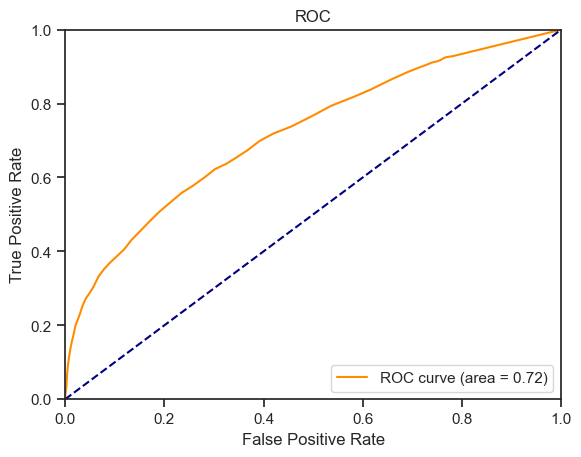

0.6602738504080995

In [ ]:
models_accuracy = pd.DataFrame(columns=['KNN', 'RForest', 'SVM', 'Neural Network' ])
knn = KNeighborsClassifier(n_neighbors=50).fit(X_train, y_train)
y_knn_n = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_knn_n)



y_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob_knn)
roc_auc = metrics.roc_auc_score(y_test, y_prob_knn)
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()
accuracy_knn


#### 6.2 -  Random Florest Classifier

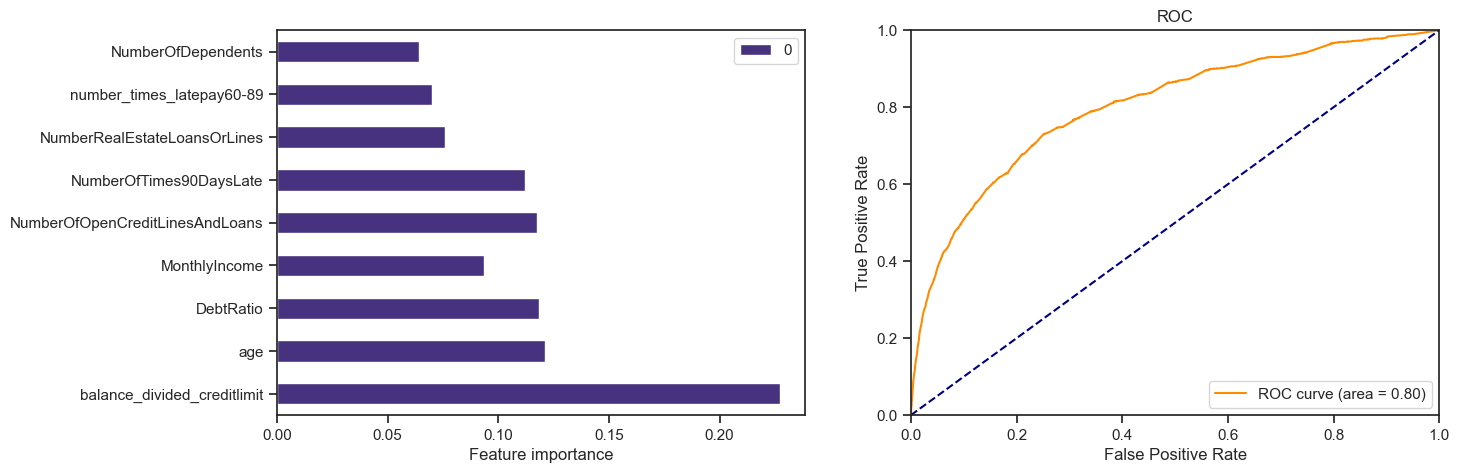

In [ ]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
y_RFC= forest.predict(X_test)
accuracy_RFC= accuracy_score(y_test, y_RFC)

#Feature importance
importance = forest.feature_importances_
global_importances = pd.DataFrame(importance, index=X_train.columns)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))



#ROC GRAPH
y_pred_prob = forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
global_importances.plot.barh(ax=axs[0])
axs[0].set_xlabel('Feature importance')
axs[1].plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
axs[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.0])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('ROC')
axs[1].legend(loc="lower right")

plt.show()


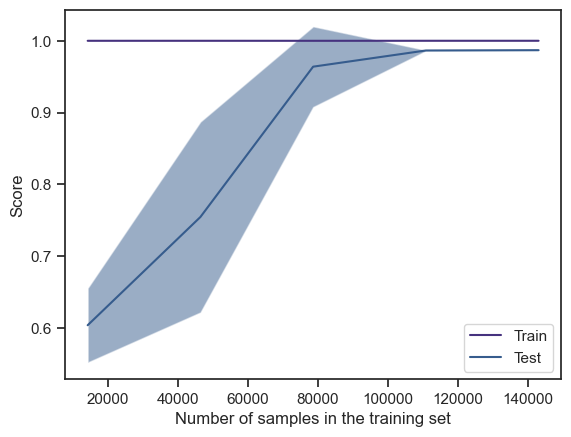

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    forest, X_train, y_train)
display = LearningCurveDisplay(train_sizes=train_sizes,
    train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()

#### 6.5 -  Neural networks

In [ ]:
model =tf.keras.Sequential(
[tf.keras.layers.Input(shape=(9,)),
 tf.keras.layers.Dense(units=50, activation='relu', ),
 tf.keras.layers.Dense(units=100, activation='relu'),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(units=50, activation='relu', ),
 tf.keras.layers.Dense(units=1, activation='sigmoid', )
]
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy',  metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
5596/5596 ━━━━━━━━━━━━━━━━━━━━ 4s 536us/step - accuracy: 0.5006 - loss: 6.1817
Epoch 2/5
5596/5596 ━━━━━━━━━━━━━━━━━━━━ 3s 537us/step - accuracy: 0.4983 - loss: 0.7784
Epoch 3/5
5596/5596 ━━━━━━━━━━━━━━━━━━━━ 3s 535us/step - accuracy: 0.5002 - loss: 0.6934
Epoch 4/5
5596/5596 ━━━━━━━━━━━━━━━━━━━━ 3s 534us/step - accuracy: 0.4998 - loss: 0.6934
Epoch 5/5
5596/5596 ━━━━━━━━━━━━━━━━━━━━ 3s 545us/step - accuracy: 0.5014 - loss: 0.6934


In [ ]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 50)             │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,105 (125.41 KB)

 Trainable params: 10,701 (41.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,404 (83.61 KB)

In [ ]:
y_nn=model.predict(X_test)

acc_NN= accuracy_score(y_test, y_nn )
print(f"Model Accuracy: {acc_NN}")

1400/1400 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step


0.5054265297007593

In [ ]:
def app(value):
    if value.argmax() == 0:
        return 0
    elif value.argmax() == 1:
        return 1
listest= []
for i in yhat_knn_new:

    listest.append(app(i))

acc_teste= np.array(listest)

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
print(y_test_rsld.shape)
from sklearn.metrics import accuracy_score


accuracy_score(y_test_rsld, acc_teste)

(44858,)


0.6631593026884837

#### 5.1 - Changing data type

In [ ]:
columns_type= ['NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'number_times_latepay60-89',
       'NumberOfDependents']

X_train[columns_type] = X_train[columns_type].astype(np.int16)
y_train = y_train.astype(np.int8)
X_train['age'] = X_train['age'].astype(np.int8)


X_test[columns_type] = X_test[columns_type].astype(np.int16)
y_test = y_test.astype(np.int8)
X_test['age'] = X_test['age'].astype(np.int8)
pd.DataFrame(X_train.dtypes)


# Note we are reducing the bits usage of the features looking for a better perfomance. Some features as 'Age' doesn't need any bigger type than int8


,0
balance_divided_creditlimit,float64
age,int8
DebtRatio,float64
MonthlyIncome,float64
NumberOfOpenCreditLinesAndLoans,int16
NumberOfTimes90DaysLate,int16
NumberRealEstateLoansOrLines,int16
number_times_latepay60-89,int16
NumberOfDependents,int16


#### 5.2 -   Normalization

In [ ]:

real_columns= X_train.columns
X_train= pd.DataFrame(normalize(X_train), columns=real_columns)
X_test = pd.DataFrame(normalize(X_test), columns=real_columns)
X_test

,balance_divided_creditlimit,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
0,1.513451e-08,0.002360,0.000005,0.999997,0.000640,0.000000,0.000080,0.0,0.000000
1,0.000000e+00,0.003091,0.000015,0.999995,0.000412,0.000000,0.000069,0.0,0.000069
2,3.074909e-04,0.020240,0.000166,0.999793,0.001687,0.000000,0.000422,0.0,0.000843
3,0.000000e+00,0.004397,0.000017,0.999990,0.000684,0.000000,0.000098,0.0,0.000098
4,4.757110e-06,0.008705,0.000044,0.999961,0.001596,0.000000,0.000145,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
44837,2.686495e-04,0.018330,0.000139,0.999819,0.004999,0.000000,0.000000,0.0,0.000000
44838,5.516826e-04,0.026481,0.000011,0.999649,0.000000,0.000552,0.000000,0.0,0.000000
44839,7.402333e-06,0.002917,0.000028,0.999995,0.000750,0.000000,0.000083,0.0,0.000000
44840,2.802414e-04,0.014012,0.000100,0.999901,0.000560,0.000280,0.000280,0.0,0.000560
